## Starting off

Define write down a definition for the following two terms:

Bias - How dependent your data is on a certain aspect of the collections process. Mostly due to human nature

Variance - How much your data changes from a central point

# Understanding the Machine Learning Process

Agenda:

- Bias versus Variance
- Train Test Split
- Model Evaluation

## The Machine Learning Process

1. Look at the big picture. 
2. Get the data. 
3. Discover and visualize the data to gain insights. 
4. Prepare the data for Machine Learning algorithms. 
5. Select a model and train it. 
6. Fine-tune your model. 
7. Present your solution. 
8. Launch, monitor, and maintain your system.


**A proper machine learning workflow includes:**

* Separate training and test sets
* Trying appropriate algorithms (No Free Lunch)
* Fitting model parameters
* Tuning impactful hyperparameters
* Proper performance metrics
* Systematic cross-validation

# Bias - Variance 

There are 3 types of prediction error: bias, variance, and irreducible error.


**Total Error = Bias + Variance + Irreducible Error**

### The Bias-Variance Tradeoff


**Let's do a thought experiment:**

1. Imagine you've collected 5 different training sets for the same problem.
2. Now imagine using one algorithm to train 5 models, one for each of your training sets.
3. Bias vs. variance refers to the accuracy vs. consistency of the models trained by your algorithm.

<img src='Bias-vs.-Variance-v5-2-darts.png' width=500 />

**High bias** algorithms tend to be less complex, with simple or rigid underlying structure.

+ They train models that are consistent, but inaccurate on average.
+ These include linear or parametric algorithms such as regression and naive Bayes.

On the other hand, **high variance** algorithms tend to be more complex, with flexible underlying structure.

+ They train models that are accurate on average, but inconsistent.
+ These include non-linear or non-parametric algorithms such as decision trees and nearest neighbors.

### Bias-Variance Tradeoff

This tradeoff in complexity is why there's a tradeoff in bias and variance - an algorithm cannot simultaneously be more complex and less complex.

**Total Error = Bias^2 + Variance + Irreducible Error**


<img src='Bias-vs.-Variance-v4-chart.png' width=500 />

### Error from Bias

**Bias** is the difference between your model's expected predictions and the true values.

<img src='noisy-sine-linear.png' width=500 />

### Error from Variance

**Variance** refers to your algorithm's sensitivity to specific sets of training data.



<img src='noisy-sine-decision-tree.png' width=500/>

Which one is overfit and which one is underfit?

We want to try to find the proper balance of variance and bias

<img src='noisy-sine-third-order-polynomial.png' width=500 />


# Train Test Split

**How do we know if our model is overfitting or underfitting?**



If our model is not performing well on the training  data, we are probably underfitting it.  


To know if our  model is overfitting the data, we need  to test our model on unseen data. 
We then measure our performance on the unseen data. 

If the model performs way worse on the  unseen data, it is probably  overfitting the data.

The previous module introduced the idea of dividing your data set into two subsets:

* **training set** —a subset to train a model.
* **test set**—a subset to test the trained model.

You could imagine slicing the single data set as follows:

<img src='testtrainsplit.png' width =550 />

**Never train on test data.** If you are seeing surprisingly good results on your evaluation metrics, it might be a sign that you are accidentally training on the test set. 



<img src='https://developers.google.com/machine-learning/crash-course/images/WorkflowWithTestSet.svg' width=500/>

## Model Evaluation Metrics for Regression

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:



![alt text](mae.png)

**Mean Squared Error** (MSE) is the mean of the squared errors:

![alt text](mse.png)

**Root Mean Squared Error (RMSE)** is the square root of the mean of the squared errors:



![alt text](rmse.png)

MSE is more popular than MAE because MSE "punishes" larger errors. 

But, RMSE is even more popular than MSE because RMSE is interpretable in the "y" units.

Additionally, I like to divide the RMSE by the standard deviation to  convert it to something similiar to a Z-Score.

# Practicum

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib
import seaborn as sns

Using matplotlib backend: MacOSX


### Read in Kings County Housing Data Set


In [56]:
df = pd.read_csv('kc_house_data.csv',index_col='id')

### Take a look at the data

In [3]:
df.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113


In [4]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Feature exploration¶

In this section I will be investigating different features by plotting them to determine the relationship to SalePrice.

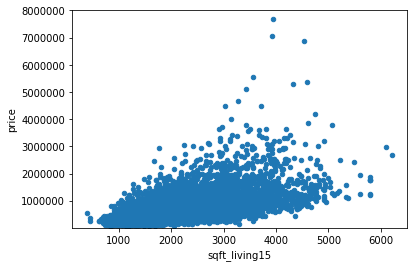

In [5]:
var = 'sqft_living15'
data = pd.concat([df['price'], df[var]], axis=1)
data.plot.scatter(x=var, y='price', ylim=(3,8000000));

In [58]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)

percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
sqft_lot15,0,0.0
sqft_living15,0,0.0
price,0,0.0
bedrooms,0,0.0
bathrooms,0,0.0
sqft_living,0,0.0
sqft_lot,0,0.0
floors,0,0.0
waterfront,0,0.0
view,0,0.0


### Identify my features and target variable

In [7]:
target = df.price

features = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront']]

In [8]:
features

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
id,,,,,,
7129300520,3,1.00,1180,5650,1.0,0
6414100192,3,2.25,2570,7242,2.0,0
5631500400,2,1.00,770,10000,1.0,0
2487200875,4,3.00,1960,5000,1.0,0
1954400510,3,2.00,1680,8080,1.0,0
...,...,...,...,...,...,...
263000018,3,2.50,1530,1131,3.0,0
6600060120,4,2.50,2310,5813,2.0,0
1523300141,2,0.75,1020,1350,2.0,0


In [9]:
features.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront'],
      dtype='object')

### Create Train and Test Split

The random state variable makes it so you can always have the same 'random' split

In [10]:
#improt train_test_split from sklearn package
from sklearn.model_selection import train_test_split

#call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=34,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)


Training set - Features:  (17290, 6) Target:  (17290,)
Training set - Features:  (4323, 6) Target:  (4323,)


In [16]:
# fit a model
from sklearn import linear_model

#instantiate a linear regression object
lm = linear_model.LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)


print(lm.intercept_)
print(lm.coef_)

71488.57750866789
[-4.66471832e+04  4.22359538e+03  2.89863585e+02 -2.97620477e-01
  7.54811375e+03  7.67517172e+05]


### How well did our model perform

Previously we have looked at the R^2 of the model  to  determine  how good of a model this is.  

In [17]:
print ("R^2 Score:", lm.score(X_train, y_train))


R^2 Score: 0.5337689493914726


In [18]:
y_train_pred = lm.predict(X_train)

In [20]:
#import the metrics module from sklearn
from sklearn import metrics

train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Mean Absolute Error:', train_mae )
print('Mean Squared Error:',  train_mse)
print('Root Mean Squared Error:' , train_rmse)

Mean Absolute Error: 165008.0997917069
Mean Squared Error: 58443415346.10072
Root Mean Squared Error: 241750.72977366732


In [21]:
price_std = target.std()

print('Mean Absolute Error:', train_mae/price_std )
print('Root Mean Squared Error:' , train_rmse/price_std)

Mean Absolute Error: 0.4494575759371252
Root Mean Squared Error: 0.6584931110791719


### Predicting the Test Set

In [22]:
y_pred = lm.predict(X_test)

Text(0, 0.5, 'Predictions')

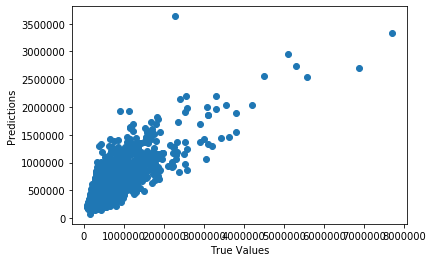

In [25]:
## The line / model
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")

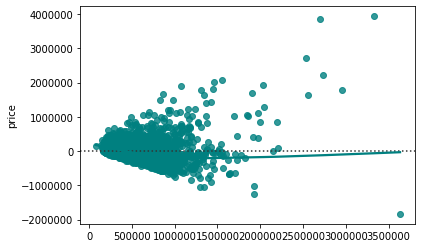

In [29]:
sns.residplot(y_pred, y_test, lowess=True, color="teal")

In [33]:
print ("Score:", lm.score(X_test, y_test))

Score: 0.5669473268829008
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122


In [34]:
test_mae = metrics.mean_absolute_error(y_test, y_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))


print('Mean Absolute Error:' + str(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error:' + str(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

Mean Absolute Error:167282.13630347874
Mean Squared Error:74658993785.75969
Root Mean Squared Error:273237.98013043444


In [35]:
print('Mean Absolute Error  Z:', test_mae/price_std )
print('Root Mean Squared Error Z:' , test_rmse/price_std)

Mean Absolute Error  Z: 0.4556517139186163
Root Mean Squared Error Z: 0.7442597082107218


### Comparing our Model's performance on training data versus test data.

In [36]:
print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Training:  241750 vs. Testing:  273237


### Let's try with more features

In [37]:
#import feature from sklearn to help us create  polynomial features
from sklearn.preprocessing import PolynomialFeatures

#instantiate this class
poly_2 = PolynomialFeatures(degree=2, interaction_only=False)
#fit and transform the data and create a  new dataframe
df_poly_2= pd.DataFrame(poly_2.fit_transform(features), columns=poly_2.get_feature_names(features.columns))


In [38]:
pd.set_option('display.max_columns', 300)


In [39]:
df_poly_2.head()

,1,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,bedrooms^2,bedrooms bathrooms,bedrooms sqft_living,bedrooms sqft_lot,bedrooms floors,bedrooms waterfront,bathrooms^2,bathrooms sqft_living,bathrooms sqft_lot,bathrooms floors,bathrooms waterfront,sqft_living^2,sqft_living sqft_lot,sqft_living floors,sqft_living waterfront,sqft_lot^2,sqft_lot floors,sqft_lot waterfront,floors^2,floors waterfront,waterfront^2
0,1.0,3.0,1.00,1180.0,5650.0,1.0,0.0,9.0,3.00,3540.0,16950.0,3.0,0.0,1.0000,1180.0,5650.0,1.0,0.0,1392400.0,6667000.0,1180.0,0.0,31922500.0,5650.0,0.0,1.0,0.0,0.0
1,1.0,3.0,2.25,2570.0,7242.0,2.0,0.0,9.0,6.75,7710.0,21726.0,6.0,0.0,5.0625,5782.5,16294.5,4.5,0.0,6604900.0,18611940.0,5140.0,0.0,52446564.0,14484.0,0.0,4.0,0.0,0.0
2,1.0,2.0,1.00,770.0,10000.0,1.0,0.0,4.0,2.00,1540.0,20000.0,2.0,0.0,1.0000,770.0,10000.0,1.0,0.0,592900.0,7700000.0,770.0,0.0,100000000.0,10000.0,0.0,1.0,0.0,0.0
3,1.0,4.0,3.00,1960.0,5000.0,1.0,0.0,16.0,12.00,7840.0,20000.0,4.0,0.0,9.0000,5880.0,15000.0,3.0,0.0,3841600.0,9800000.0,1960.0,0.0,25000000.0,5000.0,0.0,1.0,0.0,0.0
4,1.0,3.0,2.00,1680.0,8080.0,1.0,0.0,9.0,6.00,5040.0,24240.0,3.0,0.0,4.0000,3360.0,16160.0,2.0,0.0,2822400.0,13574400.0,1680.0,0.0,65286400.0,8080.0,0.0,1.0,0.0,0.0


In [40]:
X2_train, X2_test, y2_train, y2_test = train_test_split(df_poly_2, target, random_state=34,test_size=0.2)
print(X2_train.shape, y2_train.shape)
print(X2_test.shape, y2_test.shape)

(17290, 28) (17290,)
(4323, 28) (4323,)


In [41]:

lm2 = linear_model.LinearRegression()
model2 = lm2.fit(X2_train, y2_train)
y2_train_pred = lm2.predict(X2_train)


In [42]:

train2_mae = metrics.mean_absolute_error(y2_train, y2_train_pred)

In [43]:
y2_pred = lm2.predict(X2_test)
# sns.residplot(y2_pred, y2_test, lowess=True, color="g")

test2_mae = metrics.mean_absolute_error(y2_test, y2_pred)

print("Training Error: ", train2_mae, "vs. Testing Error: ", test2_mae)


Training Error:  158115.7473142857 vs. Testing Error:  158954.91890872153


Now lets try and add on  even more  variables!

In [44]:

poly = PolynomialFeatures(degree=3, interaction_only= False )


In [45]:
df_poly_3= pd.DataFrame(poly.fit_transform(features), columns=poly.get_feature_names(features.columns))
df_poly_3.head()

,1,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,bedrooms^2,bedrooms bathrooms,bedrooms sqft_living,bedrooms sqft_lot,bedrooms floors,bedrooms waterfront,bathrooms^2,bathrooms sqft_living,bathrooms sqft_lot,bathrooms floors,bathrooms waterfront,sqft_living^2,sqft_living sqft_lot,sqft_living floors,sqft_living waterfront,sqft_lot^2,sqft_lot floors,sqft_lot waterfront,floors^2,floors waterfront,waterfront^2,bedrooms^3,bedrooms^2 bathrooms,bedrooms^2 sqft_living,bedrooms^2 sqft_lot,bedrooms^2 floors,bedrooms^2 waterfront,bedrooms bathrooms^2,bedrooms bathrooms sqft_living,bedrooms bathrooms sqft_lot,bedrooms bathrooms floors,bedrooms bathrooms waterfront,bedrooms sqft_living^2,bedrooms sqft_living sqft_lot,bedrooms sqft_living floors,bedrooms sqft_living waterfront,bedrooms sqft_lot^2,bedrooms sqft_lot floors,bedrooms sqft_lot waterfront,bedrooms floors^2,bedrooms floors waterfront,bedrooms waterfront^2,bathrooms^3,bathrooms^2 sqft_living,bathrooms^2 sqft_lot,bathrooms^2 floors,bathrooms^2 waterfront,bathrooms sqft_living^2,bathrooms sqft_living sqft_lot,bathrooms sqft_living floors,bathrooms sqft_living waterfront,bathrooms sqft_lot^2,bathrooms sqft_lot floors,bathrooms sqft_lot waterfront,bathrooms floors^2,bathrooms floors waterfront,bathrooms waterfront^2,sqft_living^3,sqft_living^2 sqft_lot,sqft_living^2 floors,sqft_living^2 waterfront,sqft_living sqft_lot^2,sqft_living sqft_lot floors,sqft_living sqft_lot waterfront,sqft_living floors^2,sqft_living floors waterfront,sqft_living waterfront^2,sqft_lot^3,sqft_lot^2 floors,sqft_lot^2 waterfront,sqft_lot floors^2,sqft_lot floors waterfront,sqft_lot waterfront^2,floors^3,floors^2 waterfront,floors waterfront^2,waterfront^3
0,1.0,3.0,1.00,1180.0,5650.0,1.0,0.0,9.0,3.00,3540.0,16950.0,3.0,0.0,1.0000,1180.0,5650.0,1.0,0.0,1392400.0,6667000.0,1180.0,0.0,31922500.0,5650.0,0.0,1.0,0.0,0.0,27.0,9.00,10620.0,50850.0,9.0,0.0,3.0000,3540.0,16950.0,3.0,0.0,4177200.0,20001000.0,3540.0,0.0,95767500.0,16950.0,0.0,3.0,0.0,0.0,1.000000,1180.000,5650.000,1.000,0.0,1392400.0,6667000.0,1180.0,0.0,31922500.0,5650.0,0.0,1.0,0.0,0.0,1.643032e+09,7.867060e+09,1392400.0,0.0,3.766855e+10,6667000.0,0.0,1180.0,0.0,0.0,1.803621e+11,31922500.0,0.0,5650.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,3.0,2.25,2570.0,7242.0,2.0,0.0,9.0,6.75,7710.0,21726.0,6.0,0.0,5.0625,5782.5,16294.5,4.5,0.0,6604900.0,18611940.0,5140.0,0.0,52446564.0,14484.0,0.0,4.0,0.0,0.0,27.0,20.25,23130.0,65178.0,18.0,0.0,15.1875,17347.5,48883.5,13.5,0.0,19814700.0,55835820.0,15420.0,0.0,157339692.0,43452.0,0.0,12.0,0.0,0.0,11.390625,13010.625,36662.625,10.125,0.0,14861025.0,41876865.0,11565.0,0.0,118004769.0,32589.0,0.0,9.0,0.0,0.0,1.697459e+10,4.783269e+10,13209800.0,0.0,1.347877e+11,37223880.0,0.0,10280.0,0.0,0.0,3.798180e+11,104893128.0,0.0,28968.0,0.0,0.0,8.0,0.0,0.0,0.0
2,1.0,2.0,1.00,770.0,10000.0,1.0,0.0,4.0,2.00,1540.0,20000.0,2.0,0.0,1.0000,770.0,10000.0,1.0,0.0,592900.0,7700000.0,770.0,0.0,100000000.0,10000.0,0.0,1.0,0.0,0.0,8.0,4.00,3080.0,40000.0,4.0,0.0,2.0000,1540.0,20000.0,2.0,0.0,1185800.0,15400000.0,1540.0,0.0,200000000.0,20000.0,0.0,2.0,0.0,0.0,1.000000,770.000,10000.000,1.000,0.0,592900.0,7700000.0,770.0,0.0,100000000.0,10000.0,0.0,1.0,0.0,0.0,4.565330e+08,5.929000e+09,592900.0,0.0,7.700000e+10,7700000.0,0.0,770.0,0.0,0.0,1.000000e+12,100000000.0,0.0,10000.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,4.0,3.00,1960.0,5000.0,1.0,0.0,16.0,12.00,7840.0,20000.0,4.0,0.0,9.0000,5880.0,15000.0,3.0,0.0,3841600.0,9800000.0,1960.0,0.0,25000000.0,5000.0,0.0,1.0,0.0,0.0,64.0,48.00,31360.0,80000.0,16.0,0.0,36.0000,23520.0,60000.0,12.0,0.0,15366400.0,39200000.0,7840.0,0.0,100000000.0,20000.0,0.0,4.0,0.0,0.0,27.000000,17640.000,45000.000,9.000,0.0,11524800.0,29400000.0,5880.0,0.0,75000000.0,15000.0,0.0,3.0,0.0,0.0,7.529536e+09,1.920800e+10,3841600.0,0.0,4.900000e+10,9800000.0,0.0,1960.0,0.0,0.0,1.250000e+11,25000000.0,0.0,5000.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,3.0,2.00,1680.0,8080.0,1.0,0.0,9.0,6.00,5040.0,24240.0,3.0,0.0,4.0000,3360.0,16160.0,2.0,0.0,2

In [46]:
df_poly_3.head()

,1,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,bedrooms^2,bedrooms bathrooms,bedrooms sqft_living,bedrooms sqft_lot,bedrooms floors,bedrooms waterfront,bathrooms^2,bathrooms sqft_living,bathrooms sqft_lot,bathrooms floors,bathrooms waterfront,sqft_living^2,sqft_living sqft_lot,sqft_living floors,sqft_living waterfront,sqft_lot^2,sqft_lot floors,sqft_lot waterfront,floors^2,floors waterfront,waterfront^2,bedrooms^3,bedrooms^2 bathrooms,bedrooms^2 sqft_living,bedrooms^2 sqft_lot,bedrooms^2 floors,bedrooms^2 waterfront,bedrooms bathrooms^2,bedrooms bathrooms sqft_living,bedrooms bathrooms sqft_lot,bedrooms bathrooms floors,bedrooms bathrooms waterfront,bedrooms sqft_living^2,bedrooms sqft_living sqft_lot,bedrooms sqft_living floors,bedrooms sqft_living waterfront,bedrooms sqft_lot^2,bedrooms sqft_lot floors,bedrooms sqft_lot waterfront,bedrooms floors^2,bedrooms floors waterfront,bedrooms waterfront^2,bathrooms^3,bathrooms^2 sqft_living,bathrooms^2 sqft_lot,bathrooms^2 floors,bathrooms^2 waterfront,bathrooms sqft_living^2,bathrooms sqft_living sqft_lot,bathrooms sqft_living floors,bathrooms sqft_living waterfront,bathrooms sqft_lot^2,bathrooms sqft_lot floors,bathrooms sqft_lot waterfront,bathrooms floors^2,bathrooms floors waterfront,bathrooms waterfront^2,sqft_living^3,sqft_living^2 sqft_lot,sqft_living^2 floors,sqft_living^2 waterfront,sqft_living sqft_lot^2,sqft_living sqft_lot floors,sqft_living sqft_lot waterfront,sqft_living floors^2,sqft_living floors waterfront,sqft_living waterfront^2,sqft_lot^3,sqft_lot^2 floors,sqft_lot^2 waterfront,sqft_lot floors^2,sqft_lot floors waterfront,sqft_lot waterfront^2,floors^3,floors^2 waterfront,floors waterfront^2,waterfront^3
0,1.0,3.0,1.00,1180.0,5650.0,1.0,0.0,9.0,3.00,3540.0,16950.0,3.0,0.0,1.0000,1180.0,5650.0,1.0,0.0,1392400.0,6667000.0,1180.0,0.0,31922500.0,5650.0,0.0,1.0,0.0,0.0,27.0,9.00,10620.0,50850.0,9.0,0.0,3.0000,3540.0,16950.0,3.0,0.0,4177200.0,20001000.0,3540.0,0.0,95767500.0,16950.0,0.0,3.0,0.0,0.0,1.000000,1180.000,5650.000,1.000,0.0,1392400.0,6667000.0,1180.0,0.0,31922500.0,5650.0,0.0,1.0,0.0,0.0,1.643032e+09,7.867060e+09,1392400.0,0.0,3.766855e+10,6667000.0,0.0,1180.0,0.0,0.0,1.803621e+11,31922500.0,0.0,5650.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,3.0,2.25,2570.0,7242.0,2.0,0.0,9.0,6.75,7710.0,21726.0,6.0,0.0,5.0625,5782.5,16294.5,4.5,0.0,6604900.0,18611940.0,5140.0,0.0,52446564.0,14484.0,0.0,4.0,0.0,0.0,27.0,20.25,23130.0,65178.0,18.0,0.0,15.1875,17347.5,48883.5,13.5,0.0,19814700.0,55835820.0,15420.0,0.0,157339692.0,43452.0,0.0,12.0,0.0,0.0,11.390625,13010.625,36662.625,10.125,0.0,14861025.0,41876865.0,11565.0,0.0,118004769.0,32589.0,0.0,9.0,0.0,0.0,1.697459e+10,4.783269e+10,13209800.0,0.0,1.347877e+11,37223880.0,0.0,10280.0,0.0,0.0,3.798180e+11,104893128.0,0.0,28968.0,0.0,0.0,8.0,0.0,0.0,0.0
2,1.0,2.0,1.00,770.0,10000.0,1.0,0.0,4.0,2.00,1540.0,20000.0,2.0,0.0,1.0000,770.0,10000.0,1.0,0.0,592900.0,7700000.0,770.0,0.0,100000000.0,10000.0,0.0,1.0,0.0,0.0,8.0,4.00,3080.0,40000.0,4.0,0.0,2.0000,1540.0,20000.0,2.0,0.0,1185800.0,15400000.0,1540.0,0.0,200000000.0,20000.0,0.0,2.0,0.0,0.0,1.000000,770.000,10000.000,1.000,0.0,592900.0,7700000.0,770.0,0.0,100000000.0,10000.0,0.0,1.0,0.0,0.0,4.565330e+08,5.929000e+09,592900.0,0.0,7.700000e+10,7700000.0,0.0,770.0,0.0,0.0,1.000000e+12,100000000.0,0.0,10000.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,4.0,3.00,1960.0,5000.0,1.0,0.0,16.0,12.00,7840.0,20000.0,4.0,0.0,9.0000,5880.0,15000.0,3.0,0.0,3841600.0,9800000.0,1960.0,0.0,25000000.0,5000.0,0.0,1.0,0.0,0.0,64.0,48.00,31360.0,80000.0,16.0,0.0,36.0000,23520.0,60000.0,12.0,0.0,15366400.0,39200000.0,7840.0,0.0,100000000.0,20000.0,0.0,4.0,0.0,0.0,27.000000,17640.000,45000.000,9.000,0.0,11524800.0,29400000.0,5880.0,0.0,75000000.0,15000.0,0.0,3.0,0.0,0.0,7.529536e+09,1.920800e+10,3841600.0,0.0,4.900000e+10,9800000.0,0.0,1960.0,0.0,0.0,1.250000e+11,25000000.0,0.0,5000.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,3.0,2.00,1680.0,8080.0,1.0,0.0,9.0,6.00,5040.0,24240.0,3.0,0.0,4.0000,3360.0,16160.0,2.0,0.0,2

In [47]:

X_train3, X_test3, y_train3, y_test3 = train_test_split(df_poly_3, target, random_state=34,test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17290, 6) (17290,)
(4323, 6) (4323,)


In [48]:
# fit a model
lm3 = linear_model.LinearRegression()
lm3 = lm.fit(X_train3, y_train3)


In [49]:
y_train_pred3 = lm3.predict(X_train3)



In [50]:

train_mae3 = metrics.mean_absolute_error(y_train3, y_train_pred3)

print('Mean Absolute Error:' + str(metrics.mean_absolute_error(y_train3, y_train_pred3)))
print('Mean Squared Error:' + str(metrics.mean_squared_error(y_train3, y_train_pred3)))
print('SqRt of Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_train3, y_train_pred3))))

Mean Absolute Error:158067.9077361818
Mean Squared Error:52630513310.35777
SqRt of Mean Squared Error:229413.4113567857


In [51]:
y_pred3 = lm.predict(X_test3)

In [52]:
test_mae3 = metrics.mean_absolute_error(y_test3, y_pred3)
print('Mean Absolute Error:' + str(metrics.mean_absolute_error(y_test3, y_pred3)))
print('Mean Squared Error:' + str(metrics.mean_squared_error(y_test3, y_pred3)))
print('SqRt of Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_test3, y_pred3))))

Mean Absolute Error:158678.38075966286
Mean Squared Error:57184827016.095825
SqRt of Mean Squared Error:239133.4920417795


###  Comparing our  Training Error and Test Error across models

In [53]:
errors = [[train_mae, test_mae], 
[ train2_mae, test2_mae],
[ train_mae3, test_mae3]]

In [54]:
df_error = pd.DataFrame(errors,index=[1,2,3],  columns=['train_error', 'test_error'])

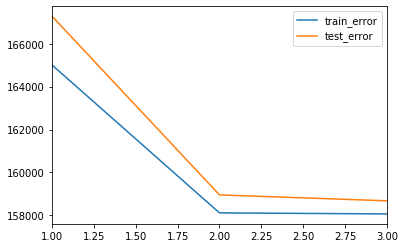

In [55]:
df_error.plot.line()